## Import Statements

In [1]:
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

## Reading Data in and Descriptive Statistics

In [2]:
files = glob.glob('./InstagramData/*.csv')

In [3]:
files

['./InstagramData\\Instagram_Year_1.csv',
 './InstagramData\\Instagram_Year_2.csv',
 './InstagramData\\Instagram_Year_3.csv',
 './InstagramData\\Instagram_Year_4.csv',
 './InstagramData\\Instagram_Year_5.csv',
 './InstagramData\\Instagram_Year_6.csv',
 './InstagramData\\Instagram_Year_7.csv',
 './InstagramData\\SZA_Chainsmoker_Insta.csv']

In [4]:
df_list = [pd.read_csv(file) for file in files]

In [5]:
df = pd.concat(df_list)

In [6]:
df.columns

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Score'],
      dtype='object')

##### Description of the fields: 
https://github.com/CrowdTangle/API/wiki/Post

In [7]:
df.shape

(385381, 15)

In [8]:
df.describe()

,Followers at Posting,Likes,Comments,Views,Sponsor Id
count,2.634390e+05,3.853810e+05,385381.000000,3.853810e+05,3.740000e+02
mean,8.036545e+06,7.100864e+04,984.764747,6.735627e+04,9.783525e+08
std,1.236633e+07,1.852657e+05,3650.072572,4.276920e+05,1.680954e+09
min,1.105900e+04,0.000000e+00,0.000000,0.000000e+00,6.398370e+05
25%,1.308932e+06,7.322000e+03,90.000000,0.000000e+00,8.548354e+07
50%,3.687874e+06,2.013700e+04,250.000000,0.000000e+00,2.995531e+08
75%,9.247391e+06,5.785300e+04,735.000000,0.000000e+00,1.153133e+09
max,1.281907e+08,1.124974e+07,586469.000000,4.343266e+07,8.482989e+09


In [9]:
df.sample(4).T

,2725,57671,50778,45562
Account,snoopdogg,Zayn Malik,Shakira,DJ KHALED
User Name,snoopdogg,zayn,shakira,djkhaled
Followers at Posting,1.79345e+07,8.63843e+06,1.68977e+07,1.53799e+07
Created,2017-06-26 22:45:24 EDT,2016-04-04 03:26:30 EDT,2016-02-26 17:03:39 EST,2019-06-04 13:02:00 EDT
Type,Video,Photo,Photo,Video
Likes,14223,956689,226567,35950
Comments,129,12384,819,557
Views,74375,0,0,175358
URL,https://www.instagram.com/p/BV06SyCDd0i/,https://www.instagram.com/p/BDxRiuTpqfp/,https://www.instagram.com/p/BCQ_t4poji8/,https://www.instagram.com/p/ByS6QMoh-aS/
Link,https://www.instagram.com/p/BV06SyCDd0i/,https://www.instagram.com/p/BDxRiuTpqfp/,https://www.instagram.com/p/BCQ_t4poji8/,https://www.instagram.com/p/ByS6QMoh-aS/


In [10]:
#Convert Datetimes
df['Created'] = pd.to_datetime(df['Created'])

C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [11]:
#Rename column
#df.rename(columns={'Created':'PostTime'},inplace=True)

In [12]:
df.sample(4).T

,33802,5178,40046,26667
Account,DJ KHALED,Silvestre Dangond,snoopdogg,DJ KHALED
User Name,djkhaled,silvestredangond,snoopdogg,djkhaled
Followers at Posting,NaN,1.66037e+06,4.15016e+06,1.83434e+06
Created,2014-03-20 17:44:25,2016-07-08 12:53:18,2015-01-19 19:56:23,2015-10-24 17:30:59
Type,Photo,Video,Video,Video
Likes,5102,14725,20866,4252
Comments,62,128,312,32
Views,0,119934,0,0
URL,https://instagram.com/p/lx6tjSru2W/,https://www.instagram.com/p/BHm57MngJhX/,http://instagram.com/p/yDnIW_P9AI/,https://instagram.com/p/9PEnREruxB/
Link,https://instagram.com/p/lx6tjSru2W/,https://www.instagram.com/p/BHm57MngJhX/,http://instagram.com/p/yDnIW_P9AI/,https://instagram.com/p/9PEnREruxB/


In [13]:
selected_columns = ['User Name', 'Followers at Posting', 'Created', 'Type', 'Likes', 'Comments', 'Views', 
                    'Description','Score']
df_selected = df[selected_columns]

In [14]:
df_selected.head()

,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,Description,Score
0,yogotti,NaN,2012-06-11 00:56:00,Photo,2069,57,0,S/O To New Orleans!!!!!!! Last Date Da Tour A ...,-6.84
1,iambeckyg,NaN,2012-06-11 01:04:15,Photo,144,5,0,Glasses,"-3,046.65"
2,yogotti,NaN,2012-06-11 01:05:39,Photo,1741,34,0,#road2richestour New Orleans,-8.19
3,yogotti,NaN,2012-06-11 01:08:31,Photo,1893,56,0,#quiet,-7.46
4,maluma,NaN,2012-06-11 02:59:43,Photo,3589,24,0,Fuck...!! He has mi camisetaaaaaa!,-242.38


In [15]:
df_selected.reset_index(inplace=True)

In [16]:
df_selected['Description'] = df_selected['Description'].astype(str)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
#Number of characters in message custom feature
df_selected['description_length'] = df_selected['Description'].apply(len)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#Number of hashtags custom feature
df_selected['hashtag_count'] = df_selected['Description'].apply(lambda x : x.count('#'))

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#Social Engagement Score
df_selected['social_engagement_score'] = (df_selected['Likes'] + df_selected['Comments']) / df_selected['Followers at Posting']

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#Set the types.
print(Counter(df_selected['Type']))
types = ['Photo', 'Video', 'Album']
#Combine Photo and Album
df_selected.loc[df_selected.Type == 'Album', 'Type'] = "Photo"

Counter({'Photo': 290276, 'Video': 86889, 'Album': 8216})


C:\Users\oldye\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
Counter(df_selected['Type'])

Counter({'Photo': 298492, 'Video': 86889})

In [22]:
#OHE for Type Field
df_selected = pd.concat([df_selected,pd.get_dummies(df_selected['Type'],prefix='type')],axis=1)

In [23]:
def time_of_day_creation(x):
    '''
    Takes in an integer and returns one of four time slots:
    ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    '''
    
    slots_out = ['created_12am-6am', 'created_6am-12pm', 'created_12pm-6pm', 'created_6pm-12am']
    slot0 = np.arange(0,6)
    slot1 = np.arange(6,12)
    slot2 = np.arange(12,18)
    slot3 = np.arange(18,24)

    if x in slot0:
        return slots_out[0]
    elif x in slot1:
        return slots_out[1]
    elif x in slot2:
        return slots_out[2]
    elif x in slot3:
        return slots_out[3]
    else:
        return 'NaN'
    

In [24]:
#Creating time of day buckets (e.g. 0-6am, 6-12pm, 12-6, 6-12am)
#time_of_day_creation(df_selected['Created'][200].hour)
#df_selected['time_of_day'] = [time_of_day_creation(x) for x in df_selected['Created']]

In [25]:
#Creating time of day buckets (e.g. 0-6am, 6-12pm, 12-6, 6-12am)
df_selected['time_of_day'] = df_selected['Created'].apply(lambda x : time_of_day_creation(x.hour))

In [26]:
#OHE for time of day field
df_selected = pd.concat([df_selected,pd.get_dummies(df_selected['time_of_day'])],axis=1)

In [27]:
Counter(df_selected['time_of_day'])

Counter({'created_12am-6am': 55798,
         'created_6am-12pm': 62653,
         'created_12pm-6pm': 143588,
         'created_6pm-12am': 123342})

In [28]:
#Time between prior and current post
df_selected.sort_values(by=['User Name','Created'], inplace=True)
df_selected['time_since_last_post'] = df_selected.groupby('User Name')['Created'].diff()

In [29]:
#Dropping extraneous columns 
df_selected.drop(['Likes','Comments','Views','time_of_day','index'],axis=1,inplace=True)
df_selected.drop('Type',axis=1,inplace=True)

In [30]:
df_selected[df_selected['User Name'] == 'shakira']

,User Name,Followers at Posting,Created,Description,Score,description_length,hashtag_count,social_engagement_score,type_Photo,type_Video,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,time_since_last_post
7195,shakira,NaN,2012-10-12 06:42:16,Good morning Baku! Buenos días Baku! Shak,-13.51,41,0,NaN,1,0,0,0,1,0,NaT
7265,shakira,NaN,2012-10-13 10:10:35,"""Sport, like #education, can help girls become...",-18.31,180,3,NaN,1,0,0,0,1,0,1 days 03:28:19
7297,shakira,NaN,2012-10-13 16:07:02,Congrats to the French team for winning the FI...,-27.81,230,0,NaN,1,0,0,1,0,0,0 days 05:56:27
7340,shakira,NaN,2012-10-14 11:58:16,"Getting ready for the show, see you in a bit #...",-10.02,107,1,NaN,1,0,0,0,1,0,0 days 19:51:14
7341,shakira,NaN,2012-10-14 12:42:41,"Y, en unos minutos su primer concierto en Crys...",-32.79,115,1,NaN,1,0,0,1,0,0,0 days 00:44:25
7351,shakira,NaN,2012-10-14 17:08:39,Hoy me sentí muy bien en el escenario! Hemos d...,-19.11,73,1,NaN,1,0,0,1,0,0,0 days 04:25:58
7352,shakira,NaN,2012-10-14 17:13:29,I felt awesome on stage! We really enjoyed ton...,-15.21,62,1,NaN,1,0,0,1,0,0,0 days 00:04:50
7478,shakira,NaN,2012-10-16 18:24:03,Today #DeCeroASiempre and the #PrimeroLoPrimer...,-45.3,174,2,NaN,1,0,0,0,0,1,2 days 01:10:34
7480,shakira,NaN,2012-10-16 18:30:13,Hoy #DeCeroASiempre y Alianza #PrimeroLoPrimer...,-48.88,138,2,NaN,1,0,0,0,0,1,0 days 00:06:10
7591,shakira,NaN,2012-10-18 14:21:15,First day on set for @NBCTheVoice Season 4. Shak,-28.72,48,0,NaN,1,0,0,1,0,0,1 days 19:51:02


In [31]:
#Rename the columns to align with rest of team
df_selected.rename(columns={'Description':'description', 'Score': 'crowdtangle_score',
                           'Followers at Posting': 'count_of_followers', 'User Name':'artist_name',
                           'Created': 'created', 'type_Video': 'type_video','type_Photo':'type_photo'
                           },inplace=True)

In [32]:
#Add Missing Columns as zero
df_selected['type_text'] = 0
df_selected['type_link'] = 0
df_selected['posts_last_7days'] = 0 #to be removed once real coding is available
df_selected['posts_last_30days'] = 0 #to be removed once real coding is available
df_selected['within_week_release'] = 0 #to be removed once real coding is available
df_selected['within_month_release'] = 0 #to be removed once real coding is available

In [33]:
df_selected.sample(4).T

,124755,219483,361579,160926
artist_name,camilomusica,noriel,johnmayer,scorpions
count_of_followers,NaN,NaN,3.81632e+06,NaN
created,2015-03-21 16:33:46,2016-07-18 20:40:29,2018-12-22 21:59:13,2015-09-24 16:36:54
description,"¿Qué, una pola? \n#ITSMILLERTIME",Faltan 4 Dias Pa Que Salga #Diablita To El Que...,@bravoandy cool if I post? 🎄,"""Coming Home"", the unreleased demo from the de..."
crowdtangle_score,-7.93,-11.92,1.5,-2.96
description_length,31,224,28,112
hashtag_count,1,1,0,1
social_engagement_score,NaN,NaN,0.082655,NaN
type_photo,1,1,1,0
type_video,0,0,0,1


In [34]:
df_selected.to_csv('instagram_7yrs_cleaned.csv')

##### Aggregation Code (v1)

In [35]:
#convert times to rounded hours
df['Created'] = df.Created.dt.floor('H')

In [36]:
#Omitting aggregation for v2
df_aggregate = df.groupby(["User Name", "Created"], as_index=False).agg({"Account": "count"})

In [37]:
df_aggregate[0:3]

,User Name,Created,Account
0,21savage,2012-07-06 03:00:00,1
1,21savage,2012-08-04 05:00:00,1
2,21savage,2012-08-11 23:00:00,2


In [38]:
#df.rename(columns={'Created':'PostTime'},inplace=True)
df_aggregate.rename(columns={'Account':'Count'},inplace=True)

In [39]:
df_aggregate.to_csv('instagram_7yrs_agg.csv')

## Reducing data to top 5 artists for exploratory analysis
Justin Timberlake
Maluma
Pink
Avril Lavigne
Willie Nelson

In [40]:
top_5 = ['justintimberlake', 'maluma', 'pink', 'avrillavigne', 'willienelsonofficial']
df_top5 = df[df['User Name'].isin(top_5)]

In [41]:
set(df_top5['User Name'])

{'avrillavigne', 'justintimberlake', 'maluma', 'pink', 'willienelsonofficial'}

In [42]:
df_top5.shape

(10565, 15)

In [43]:
# Get one artist
df_j = df_top5[df_top5['User Name'] == top_5[0]]

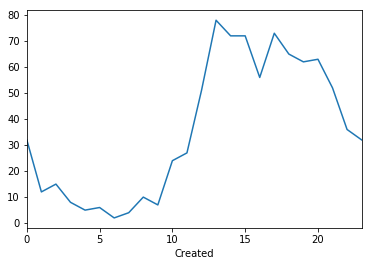

In [45]:
#Posts by hour of day
df_j['Account'].groupby(df_j['Created'].dt.hour).count().plot(kind='line')

In [ ]:
#Displaying for each user, their posts by hour aggregated for all time periods. 
df_top5.groupby(['User Name',df_top5['Created'].dt.hour]).count()['Account'].unstack('User Name').plot(kind='line')

#Users post heavily beginning around 10-11am and start slowing down around 8pm.

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
df_top5['User Name'].value_counts().plot(ax=ax,kind='bar')
plt.plot()

##### Just for Justin Timberlake

In [46]:
#Have to change index to datetime in order to do groupings I want
df_j.index = df_j['Created'] 

In [47]:
df_j = df_j.resample('M', how='count')

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


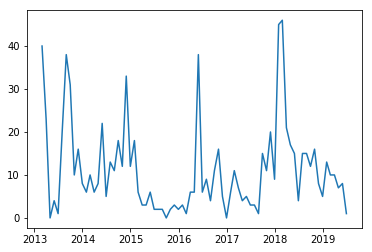

In [48]:
plt.plot(df_j.index,df_j['Account'])

###### For Top 5 artists

In [49]:
df_top5.index = df_top5['Created']

In [50]:
df_top5['month'] = df_top5['Created'].dt.month
df_top5['year'] = df_top5['Created'].dt.year

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
df_top5.sample(5)

,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Description,Sponsor Id,Sponsor Name,Score,month,year
Created,,,,,,,,,,,,,,,,,
2016-02-15 00:00:00,Avril Lavigne,avrillavigne,2729081.0,2016-02-15 00:00:00,Photo,102235,807,0,https://www.instagram.com/p/BBy2OUII4Mu/,https://www.instagram.com/p/BBy2OUII4Mu/,https://scontent.cdninstagram.com/t51.2885-15/...,Dinner with Alice Cooper. #legend #grammyparty,NaN,NaN,-1.49,2,2016
2017-12-11 17:00:00,MALUMA,maluma,30001009.0,2017-12-11 17:00:00,Photo,362526,6852,0,https://www.instagram.com/p/Bck_lMPlelM/,https://www.instagram.com/p/Bck_lMPlelM/,https://scontent.cdninstagram.com/t51.2885-15/...,"30 MILLONES!! Somos una familia muy numerosa, ...",NaN,NaN,-2.37,12,2017
2016-02-20 18:00:00,MALUMA,maluma,9520736.0,2016-02-20 18:00:00,Video,87582,1620,542196,https://www.instagram.com/p/BCBwF7nx-m6/,https://www.instagram.com/p/BCBwF7nx-m6/,https://scontent.cdninstagram.com/t51.2885-15/...,#Repost @katika_gomez\n・・・\nTe Amo Hermosa 💕👸👊...,NaN,NaN,-3.16,2,2016
2016-09-29 22:00:00,MALUMA,maluma,16229201.0,2016-09-29 22:00:00,Video,182153,6774,618574,https://www.instagram.com/p/BK9rddnDUNd/,https://www.instagram.com/p/BK9rddnDUNd/,https://scontent.cdninstagram.com/t51.2885-15/...,De camino a Bolivia. Mañana nos vemos en La Pa...,NaN,NaN,-1.52,9,2016
2018-04-08 17:00:00,MALUMA,maluma,32082976.0,2018-04-08 17:00:00,Album,528834,3834,0,https://www.instagram.com/p/BhUyYcYF3Vg/,https://www.instagram.com/p/BhUyYcYF3Vg/,https://scontent.xx.fbcdn.net/v/t51.2885-15/29...,@ricky_martin Que enorme placer compartir el e...,NaN,NaN,-1.48,4,2018


NameError: name 'ax' is not defined

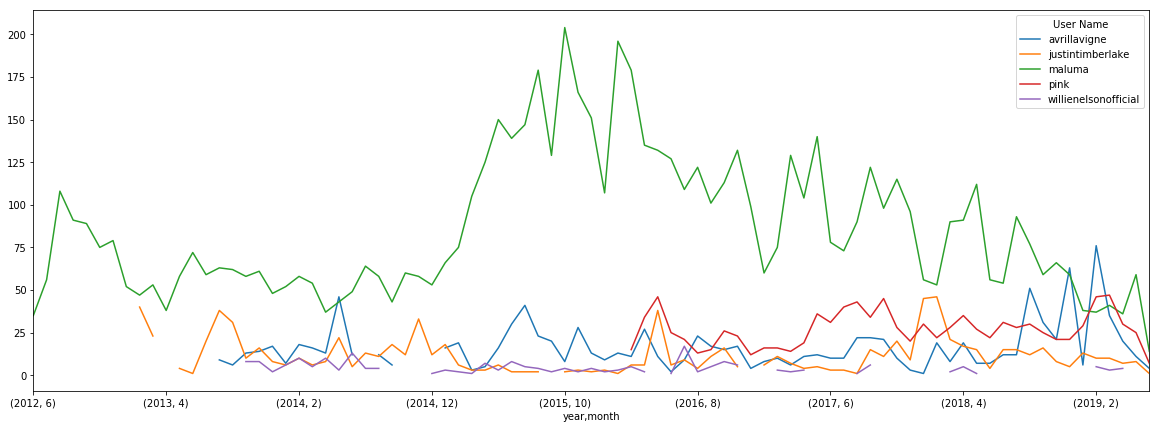

In [52]:
a = df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name')
df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name').plot(figsize=(20,7))

#how to get x axis to be more detailed... not working
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))


#would love to put dots where we had album / track releases... how to do?? Code below not functional
markers_on = [50, 70, 90, 1000]
plt.plot(markevery=markers_on)
plt.show()

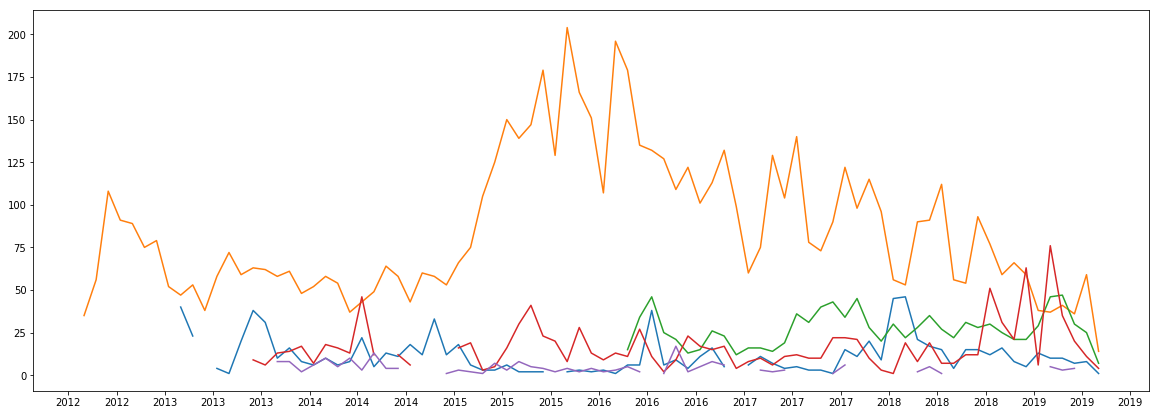

In [54]:
#Trying to do the above plot in a different way so I can control the x axis
daterange = pd.date_range(min(df_top5['Created']),max(df_top5['Created']),periods=len(a))
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
markers_on = [1,10, 50, 70]
for name in top_5:
    ax.plot(daterange,a[name])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) #how to get to show months instead?

In [55]:
daterange.shape

(85,)

In [56]:
a[name].shape

(85,)

##### Number of Followers Review

In [134]:
df_top5.shape

(10565, 17)

In [132]:
print("NAs for # of followers: ", df_top5['Followers at Posting'].isna().sum())

NAs for # of followers:  3981
